The goal for this project is to uncover different business features in the united states to benifit potential and exisiting businesses. For the exisiting businesses, it will help them to determin their competitors. For the new ones, it will help them to discover new opportunties.

# Import business.json data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql 
import json
import csv
import random
import string
import pandas.io.sql as pdSQL

In [3]:
mydf = pd.read_json('/Users/macbookair/Downloads/dataset 2/business.json', lines= True)

In [4]:
mydf

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'WheelchairAcces...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Friday': '10:00-21:...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'HasTV': False, 'GoodForMeal': {'latenight': ...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Friday': '10:00-22:...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'WiFi': 'no', 'OutdoorSeating': False, 'Resta...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Friday': '10:00-19:...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Wednesday': '9:00-17...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'HasTV': False, 'GoodForMeal': {'latenight': ...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ
5,2017 E Camelback Rd,"{'RestaurantsPriceRange2': 2, 'BikeParking': T...",uUEMrhJiL1a1pCA_I1SU7Q,"[Shopping, Tobacco Shops]",Phoenix,"{'Monday': '10:00-20:00', 'Friday': '10:00-21:...",0,33.508068,-112.037552,Baxter's Cigars,,85016,35,5.0,AZ
6,"4425 N 24th St, Ste 125","{'ByAppointmentOnly': True, 'AcceptsInsurance'...",2eJEUJIP54tex7T9YOcLSw,"[Chiropractors, Health & Medical]",Phoenix,"{'Friday': '9:00-12:00', 'Wednesday': '14:30-1...",1,33.502848,-112.012696,Back-Health Chiropractic,,85016,19,5.0,AZ
7,5770 Butler St,{'BusinessAcceptsCreditCards': True},fEylCY3UEH8YJ0Xa7lu6lA,"[Automotive, Oil Change Stations, Car Wash, Au...",Pittsburgh,"{'Monday': '8:00-17:00', 'Friday': '8:00-17:00...",1,40.485939,-79.943727,Auto Bathouse,Lawrenceville,15201,16,2.5,PA
8,3220 Washington Rd,"{'DogsAllowed': True, 'WheelchairAccessible': ...",kFtuYklkAIlmYw8RZAieGw,"[Jewelry Repair, Gold Buyers, Local Services, ...",McMurray,"{'Monday': '10:00-18:00', 'Friday': '10:00-18:...",1,40.290498,-80.110021,JAB Jewelry Designs,,15317,7,5.0,PA
9,"1425 S Higley Rd, Ste 103","{'ByAppointmentOnly': True, 'AcceptsInsurance'...",NqiQdFa93wzUJGo29NbTPQ,"[Health & Medical, Optometrists]",Gilbert,"{'Friday': '7:30-11:00', 'Wednesday': '7:30-17...",1,33.324539,-111.720449,Neighborhood Vision Center,,85296,8,5.0,AZ


# Data exploration by python

First, check the amount of business in the yelp database. 

In [5]:
mydf.shape

(156639, 15)

From the above, we can see that there are 156639 businesses in the U.S, and below we are going explor the location of the businesses.  

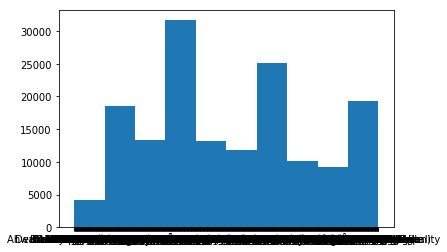

In [4]:
plt.hist(mydf[['city']])
plt.show()

In [5]:
mydf['city'].value_counts()

Las Vegas                      24768
Phoenix                        15656
Toronto                        15483
Charlotte                       7557
Scottsdale                      7510
Pittsburgh                      5688
Montréal                        5175
Mesa                            5146
Henderson                       4130
Tempe                           3949
Chandler                        3649
Edinburgh                       3625
Cleveland                       2979
Madison                         2891
Glendale                        2841
Gilbert                         2835
Mississauga                     2316
Stuttgart                       1975
Peoria                          1527
Markham                         1390
North Las Vegas                 1254
Champaign                       1084
North York                       944
Surprise                         934
Scarborough                      870
Richmond Hill                    770
Concord                          726
G

As we can see Las Vegas has the most amount of business, so it is reasonable to assume that there are a lot of opportunities as well as competitions. 

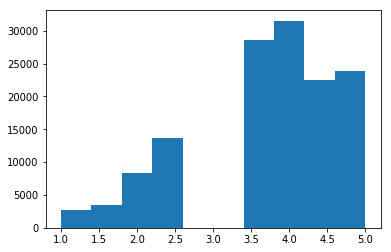

In [8]:
plt.hist(mydf[['stars']])
plt.show()

In [9]:
mydf[['stars']].mean()

stars    3.647154
dtype: float64

In [11]:
mydf['rank'].corr(mydf['review_count'])

-0.38490690747557477


Based on the business table and the bar chart, most resturants received scores aboe 3, and no resturants have an average score of 3. We want to look at how individual customers revied each resturants. Above, we used SQL to calculate the propotion of individual ratings, and found out that most of peopel gave 5-star reviews. 
It is reasonably to assume that most resturants should have a 4 to 5 star rating. 

# Data Exploration and basis analysis  by PYMYSQL

In [6]:
conn = pymysql.connect('localhost','root','123456', db ='yelp_db')

In [7]:
cursor = conn.cursor()

In [8]:
sql = '''
        SELECT stars, (count(stars)*100/(select count(*) From review)) as score
        FROM review
        group by stars
        ;
    '''
cursor.execute(sql)
cursor.fetchall()

((1, Decimal('13.5078')),
 (2, Decimal('8.4949')),
 (3, Decimal('12.0505')),
 (4, Decimal('23.9784')),
 (5, Decimal('41.9685')))

In [46]:
test_nei=pdSQL.read_sql("""
SELECT neighborhood, state, COUNT(DISTINCT name) as num_res, COUNT(review_count) AS count, (COUNT(DISTINCT name)/COUNT(review_count)) as ave_rew
FROM business 
WHERE neighborhood IS NOT NULL
AND neighborhood != " "
GROUP BY state, neighborhood
ORDER BY count
DESC LIMIT 20""", conn)
print (test_nei)

          neighborhood state  num_res  count  ave_rew
0             Westside    NV     3015   3237   0.9314
1            Southeast    NV     2770   3082   0.8988
2            The Strip    NV     2334   2626   0.8888
3        Spring Valley    NV     2225   2405   0.9252
4          Ville-Marie    QC     1992   2173   0.9167
5          Scarborough    ON     1578   1751   0.9012
6             Eastside    NV     1596   1714   0.9312
7             Downtown    NV     1582   1629   0.9711
8   Plateau-Mont-Royal    QC     1385   1433   0.9665
9        Downtown Core    ON     1250   1381   0.9051
10           Southwest    NV     1082   1187   0.9115
11           Etobicoke    ON     1076   1160   0.9276
12              Anthem    NV      964    992   0.9718
13           Northwest    NV      838    914   0.9168
14          Centennial    NV      803    871   0.9219
15           Summerlin    NV      748    789   0.9480
16           Chinatown    NV      769    783   0.9821
17            New Town   EDH

We ranked the review count of each neighborhood in the USA, and found that neighborhoods in NV has the most review counts and restaurants, generally. The average review counts look approximately similar to each other. Hence, it is fair to say that the reviews count is an accurate represenation of the popularity.

In [47]:
test_cat=pdSQL.read_sql("""
SELECT category, COUNT(*) AS count 
FROM category 
JOIN business ON category.business_id=business.id 
GROUP BY category 
ORDER BY count 
DESC LIMIT 10""", conn)
print (test_cat)

           category  count
0       Restaurants  51613
1          Shopping  24595
2              Food  23014
3     Beauty & Spas  15139
4     Home Services  13202
5  Health & Medical  12033
6         Nightlife  11364
7              Bars   9868
8        Automotive   9476
9    Local Services   9343


We also sorted the different categories, and found out that the majority of business in Yelp is restaurants. Hence, we are going to continue our study below only on restaurants. 

In [53]:
test_hour=pdSQL.read_sql("""
SELECT hours, count(review_count) AS sum_rew
FROM hours 
JOIN business ON hours.business_id=business.id  
GROUP BY hours
ORDER BY sum_rew DESC 
LIMIT 10""", conn)
print (test_hour)

                  hours  sum_rew
0      Sunday|0:00-0:00     6207
1    Saturday|0:00-0:00     5855
2   Wednesday|0:00-0:00     5613
3    Thursday|0:00-0:00     5613
4     Tuesday|0:00-0:00     5604
5      Monday|0:00-0:00     5602
6      Friday|0:00-0:00     5600
7     Monday|8:00-17:00     4694
8    Tuesday|8:00-17:00     4690
9  Wednesday|8:00-17:00     4688


Based on the analysis above, businesses with longer hours tend to get more reviews. For the resturants open 24/7, it is more likely it will get more traffic.

# Import review.json data

In [17]:
lines = open('/Users/macbookair/Downloads/dataset 2/review.json').readlines()
reviews = []
for line in lines:
    reviews.append(json.loads(line))
# reviewsstr=''.join(str(e) for e in lines)
# reviews = json.loads(reviewsstr)
print(reviews[0])

{'text': 'My girlfriend and I stayed here for 3 nights and loved it. The location of this hotel and very decent price makes this an amazing deal. When you walk out the front door Scott Monument and Princes street are right in front of you, Edinburgh Castle and the Royal Mile is a 2 minute walk via a close right around the corner, and there are so many hidden gems nearby including Calton Hill and the newly opened Arches that made this location incredible.\n\nThe hotel itself was also very nice with a reasonably priced bar, very considerate staff, and small but comfortable rooms with excellent bathrooms and showers. Only two minor complaints are no telephones in room for room service (not a huge deal for us) and no AC in the room, but they have huge windows which can be fully opened. The staff were incredible though, letting us borrow umbrellas for the rain, giving us maps and directions, and also when we had lost our only UK adapter for charging our phones gave us a very fancy one for f

### random sample selected

Randomly select 50000 reviews to analysis, becasue the amount should be enough to get a conclusion and won't kill the laptop due to data size.

In [18]:
sample_reviews = [ reviews[i] for i in sorted(random.sample(range(len(reviews)), 50000)) ]

Transform capital characters.

In [19]:
words = []
for i in range(len(sample_reviews)):
    words.append(sample_reviews[i]['text'].lower())

Count the number of words from the reviews.

In [20]:
popular_words= {}
for i in range(len(words)):
    for buzz in words[i].split():
        if buzz not in popular_words:
            popular_words[buzz] = 1
        else:
            popular_words[buzz] +=1

Remove punctuations

In [21]:
import fileinput

wordss = [',', '.', '!', ';', '!!', '!!!!!','"', '"50/50', '"\'this', '!"', '",', '".', '!!!', '!!!!', '!!!!!!', '!!.', '!)', '!?']

for i in wordss:
    if i in popular_words:
        popular_words.pop(i, None)

### Analysis popular features of restaurants from reivews

In [22]:
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [23]:
popwords = ['food', 'service', 'time', 'staff', 'friendly', 'location', 'price', 'sauce', 'atmosphere','parking','music']

In [24]:
pop_words = dictfilt(popular_words, popwords)

In [25]:
pop_words_sorted_keys = sorted(pop_words, key=pop_words.get, reverse=True)
for r in pop_words_sorted_keys:
    print (r, pop_words[r])

food 18457
time 12413
service 12390
staff 6357
friendly 4866
location 3043
price 2942
sauce 2808
atmosphere 1715
parking 1582
music 1196


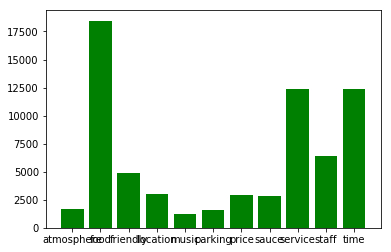

In [26]:
plt.bar(list(pop_words.keys()), pop_words.values(), color='g')
plt.show()

The rank of key words in the list indicates features of restaurants. The list shows the different level of importance of the identities by the number counted from reviews. The key words are searched from Google to classify the restaurants. Hence, the "pop_words" dictionary, showing the counts of the words, can be applied by businesses to identify what is appealing to customers. In other words, hosts get clue about where to focus on or to emphasis in order to attract customers.

Accordingly, the food is undoubtly the most important element, following by service and time, around one fourth in 50000 reviews. Counts of the three words are significantly larger that the others, so logically, all the businesses should pay more attention to promote themselves.

### Analysis popular foods types from reviews

In [27]:
popfood = ['chicken', 'pizza', 'cheese', 'salad', 'drink', 'burger', 'soup', 'coffee', 'fries','thai', 'tacos', 'steak','sandwich','pork', 'bread','buffet']

In [28]:
pop_food = dictfilt(popular_words, popfood)

In [29]:
pop_food_sorted_keys = sorted(pop_food, key=pop_food.get, reverse=True)
for r in pop_food_sorted_keys:
    print (r, pop_food[r])

chicken 5576
pizza 3519
cheese 3075
salad 2682
drink 2333
coffee 2220
burger 2220
fries 2056
steak 1795
sandwich 1775
pork 1734
bread 1706
soup 1417
thai 1162
tacos 1040
buffet 1006


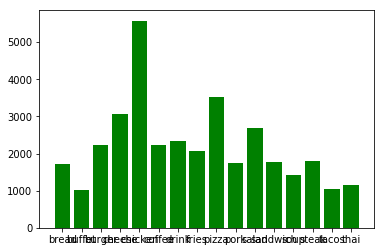

In [30]:
plt.bar(list(pop_food.keys()), pop_food.values(), color='g')
plt.show()

For the entrepreneurs, where to begin with is also a critical question. From the rank of the key words of foods, it is shown that chicken is more poppular than pork and steak. Besides, when it comes to food types, pizza looks appear more often than others, and salad, burger going after that. Tacos is absolutely mentioned less times, almost only one third. Coffee and drink are also good ideas with large population likely to head for.